 ## Imports and Configuration

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/MLNS/Kaggle


/content/drive/MyDrive/MLNS/Kaggle


## Data Preprocessing

### Import and Format data

In [4]:
data = pd.read_csv('train.txt', sep=' ', header =None)
test_data = pd.read_csv('test.txt', sep=' ', header =None)

In [5]:
data.head()

,0,1,2
0,939,3809,1
1,2442,5784,1
2,179,3809,1
3,857,2280,1
4,1358,5722,1


In [6]:
data.shape

(10496, 3)

In [7]:
data.columns  = ['Source', 'Target' , 'Link']

In [8]:
data.head()

,Source,Target,Link
0,939,3809,1
1,2442,5784,1
2,179,3809,1
3,857,2280,1
4,1358,5722,1


In [9]:
unique_nodes = list(data['Source']) +list(data['Target'])
unique_nodes = list(set(unique_nodes))
len(unique_nodes)

3597

### Create graph

In [10]:
g = nx.Graph()

In [11]:
g.add_nodes_from(unique_nodes)

In [12]:
tuples_list = []
only_link_df  = data[data['Link'] ==1]
for index , row in only_link_df.iterrows():
    source = row['Source']
    target = row['Target']
    
    tuples_list.append((source, target))

In [13]:
tuples_list[:5]

[(939, 3809), (2442, 5784), (179, 3809), (857, 2280), (1358, 5722)]

In [14]:
g.add_edges_from(tuples_list)

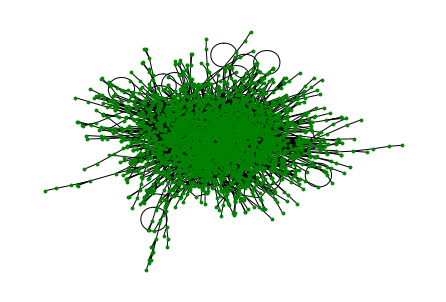

In [15]:
pos=nx.spring_layout(g)
nx.draw(g, pos=pos, node_color='g', node_size=8, with_labels=False)
plt.show()

## Features

In [16]:
pr_dict = nx.pagerank(g)

In [17]:
len(pr_dict)

3597

In [18]:
len(unique_nodes)

3597

In [19]:
degree_list = nx.degree(g)

In [20]:
degCent = nx.degree_centrality(g)

In [21]:
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True, k = 50)

In [22]:
hubs_dict, auth_dict = nx.hits(g)

In [23]:
degree_dict = {}

for x,y  in degree_list  :
    degree_dict[x] = y
    
len(degree_dict)

3597

In [24]:
final_data_list = []
def transform_data(df, add_link = True) :
    
    for index, row in df.iterrows():
        src = row['Source']
        tgt = row['Target']
        
        data_list = []
        data_list.append(pr_dict[src])
        data_list.append(hubs_dict[src])
        data_list.append(auth_dict[src])
        data_list.append(degCent[src])
        data_list.append(betCent[src])
        data_list.append(degree_dict[src])
        data_list.append(pr_dict[tgt])
        data_list.append(hubs_dict[tgt])
        data_list.append(auth_dict[tgt])
        data_list.append(degCent[tgt])
        data_list.append(betCent[tgt])
        data_list.append(degree_dict[tgt])
        if add_link == True :
            data_list.append(row['Link'])
        
        final_data_list.append(data_list)
    if add_link == True :
        col_list = ['SrcPageRank','SrcHubs', 'SrcAuth','SrcDegCnt','SrcBetCnt','SrcDeg',
           'TgtPageRank','TgtHubs', 'TgtAuth','TgtDegCnt','TgtBetCnt','TgtDeg',
           'Link']
        new_df = pd.DataFrame(final_data_list, columns = col_list)        
    else :
        col_list = ['SrcPageRank','SrcHubs', 'SrcAuth','SrcDegCnt','SrcBetCnt','SrcDeg',
           'TgtPageRank','TgtHubs', 'TgtAuth','TgtDegCnt','TgtBetCnt','TgtDeg']
        new_df = pd.DataFrame(final_data_list, columns = col_list)        
    return new_df
              


In [25]:
new_df = transform_data(data)        
print(len(final_data_list))        
print(len(new_df))

10496
10496


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10496 entries, 0 to 10495
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SrcPageRank  10496 non-null  float64
 1   SrcHubs      10496 non-null  float64
 2   SrcAuth      10496 non-null  float64
 3   SrcDegCnt    10496 non-null  float64
 4   SrcBetCnt    10496 non-null  float64
 5   SrcDeg       10496 non-null  int64  
 6   TgtPageRank  10496 non-null  float64
 7   TgtHubs      10496 non-null  float64
 8   TgtAuth      10496 non-null  float64
 9   TgtDegCnt    10496 non-null  float64
 10  TgtBetCnt    10496 non-null  float64
 11  TgtDeg       10496 non-null  int64  
 12  Link         10496 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 1.0 MB


In [27]:
new_df.corr()

,SrcPageRank,SrcHubs,SrcAuth,SrcDegCnt,SrcBetCnt,SrcDeg,TgtPageRank,TgtHubs,TgtAuth,TgtDegCnt,TgtBetCnt,TgtDeg,Link
SrcPageRank,1.000000,0.654600,0.654600,0.990984,0.865327,0.990984,-0.026690,-0.027217,-0.027217,-0.024592,-0.021916,-0.024592,0.137239
SrcHubs,0.654600,1.000000,1.000000,0.624665,0.556375,0.624665,0.306647,0.313975,0.313975,0.306293,0.306709,0.306293,0.025835
SrcAuth,0.654600,1.000000,1.000000,0.624665,0.556375,0.624665,0.306647,0.313975,0.313975,0.306293,0.306709,0.306293,0.025835
SrcDegCnt,0.990984,0.624665,0.624665,1.000000,0.875160,1.000000,-0.027793,-0.030067,-0.030067,-0.024732,-0.022650,-0.024732,0.161704
SrcBetCnt,0.865327,0.556375,0.556375,0.875160,1.000000,0.875160,-0.012399,-0.015230,-0.015230,-0.009865,-0.000518,-0.009865,0.133318
SrcDeg,0.990984,0.624665,0.624665,1.000000,0.875160,1.000000,-0.027793,-0.030067,-0.030067,-0.024732,-0.022650,-0.024732,0.161704
TgtPageRank,-0.026690,0.306647,0.306647,-0.027793,-0.012399,-0.027793,1.000000,0.995122,0.995122,0.999660,0.996174,0.999660,0.222758
TgtHubs,-0.027217,0.313975,0.313975,-0.030067,-0.015230,-0.030067,0.995122,1.000000,1.000000,0.993123,0.989483,0.993123,0.188945
TgtAuth,-0.027217,0.313975,0.313975,-0.030067,-0.015230,-0.030067,0.995122,1.000000,1.000000,0.993123,0.989483,0.993123,0.188945
TgtDegCnt,-0.024592,0.306293,0.306293,-0.024732,-0.009865,-0.024732,0.999660,0.993123,0.993123,1.000000,0.996575,1.000000,0.230747


In [28]:
new_df.shape

(10496, 13)

## Modelling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X = new_df.drop('Link', axis =1)
y = new_df['Link']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.1, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(9446, 12)
(1050, 12)


In [30]:
from sklearn.ensemble import GradientBoostingClassifier  
import xgboost
from lightgbm import LGBMClassifier
# classifier = GradientBoostingClassifier()  

classifier = xgboost.XGBClassifier()

# First Submission
# classifier = LGBMClassifier(
#             nthread=4,
#             n_estimators=10000,
#             learning_rate=0.02,
#             num_leaves=34,
#             colsample_bytree=0.9497036,
#             subsample=0.8715623,
#             max_depth=8,
#             reg_alpha=0.041545473,
#             reg_lambda=0.0735294,
#             min_split_gain=0.0222415,
#             min_child_weight=39.3259775,
#             silent=-1,
#             verbose=-1 )


classifier.fit(X_train, y_train )

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test) 

In [31]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print("Accuracy for Train data {} %".format(train_acc*100))
print("Accuracy for Test data {} %".format(test_acc*100))

Accuracy for Train data 97.52276095701885 %
Accuracy for Test data 91.04761904761904 %


In [32]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced accuracy for Train data {} %'.format(balanced_accuracy_score(y_train,y_train_pred)*100))
print('Balanced accuracy for Test data {} %'.format(balanced_accuracy_score(y_test,y_test_pred)*100))

Balanced accuracy for Train data 97.52047187249178 %
Balanced accuracy for Test data 91.08309143686502 %


In [33]:
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix for Train data :\n" , train_cm)
print("Confusion Matrix for Test data :\n" , test_cm)

Confusion Matrix for Train data :
 [[4499  219]
 [  15 4713]]
Confusion Matrix for Test data :
 [[463  67]
 [ 27 493]]


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report on Train Data\n',classification_report(y_train,y_train_pred))
print('Confusion Matrix on Train Data\n',confusion_matrix(y_train, y_train_pred))
print('\nClassification Report on Test Data\n',classification_report(y_test,y_test_pred))
print('Confusion Matrix on Test Data\n',confusion_matrix(y_test, y_test_pred))

Classification Report on Train Data
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      4718
           1       0.96      1.00      0.98      4728

    accuracy                           0.98      9446
   macro avg       0.98      0.98      0.98      9446
weighted avg       0.98      0.98      0.98      9446

Confusion Matrix on Train Data
 [[4499  219]
 [  15 4713]]

Classification Report on Test Data
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       530
           1       0.88      0.95      0.91       520

    accuracy                           0.91      1050
   macro avg       0.91      0.91      0.91      1050
weighted avg       0.91      0.91      0.91      1050

Confusion Matrix on Test Data
 [[463  67]
 [ 27 493]]


In [35]:
scores = cross_val_score(classifier, X, y, cv=10)
scores

array([0.91904762, 0.91904762, 0.9       , 0.91714286, 0.90571429,
       0.90761905, 0.90657769, 0.92564347, 0.8884652 , 0.90657769])

## Prediction

In [36]:
test_data.columns = ['Source','Target']
final_data_list = []
test_df = transform_data(test_data, add_link= False)        
print(len(test_df))        
print(len(test_data))


3498
3498


In [37]:
test_df.head()

,SrcPageRank,SrcHubs,SrcAuth,SrcDegCnt,SrcBetCnt,SrcDeg,TgtPageRank,TgtHubs,TgtAuth,TgtDegCnt,TgtBetCnt,TgtDeg
0,0.000146,8.357243e-09,8.357243e-09,0.000278,0.000278,1,0.000183,2.886810e-06,2.886810e-06,0.000556,0.002482,2
1,0.000190,7.257390e-07,7.257390e-07,0.000556,0.000315,2,0.000220,3.643171e-06,3.643171e-06,0.000556,0.000556,2
2,0.000137,1.783129e-07,1.783129e-07,0.000278,0.000278,1,0.000248,6.059582e-07,6.059582e-07,0.000556,0.000556,2
3,0.000122,5.395305e-07,5.395305e-07,0.000278,0.000278,1,0.000350,2.064806e-06,2.064806e-06,0.001112,0.000629,4
4,0.000178,9.566596e-06,9.566596e-06,0.000556,0.000295,2,0.000110,2.320759e-06,2.320759e-06,0.000278,0.000278,1


In [38]:
y_pred = classifier.predict(test_df)

In [39]:
submit_df = pd.DataFrame()
submit_df['id'] = list(range(len(test_df)))
submit_df['predicted'] = list(y_pred)

submit_df.to_csv('submission.csv', index = False)